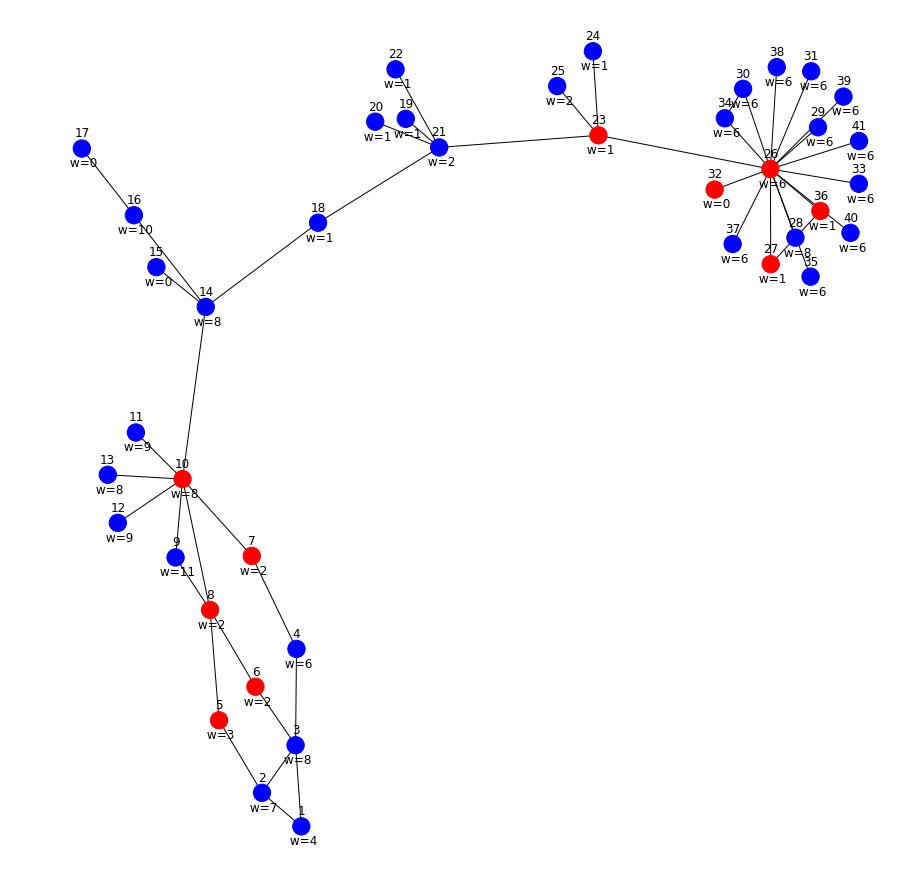

In [2]:
import sys
import matplotlib.pyplot as plt
import networkx as nx

#######################
#graph - adjacency
G = nx.Graph()
weights = [0, 2,2,2,3,2,2,2,1,8,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0];
alpha = 1
weights_additional = [4, 5, 6, 4, 0, 0, 0, 0, 10, 0, 8, 8, 8, 8, 0, 10, 0, 1, 1, 1, 1, 
                     1, 0, 1, 1, 0, 0, 8, 6, 6, 6, 0, 6, 6, 6, 0, 6, 6, 6, 6, 6]

weights_additional = [x*alpha for x in weights_additional]
weights = [weights[x] + weights_additional[x] for x in range(41)]

for i in range(1,42):
    G.add_node(i, weight=weights[i-1])
    #weights[2]

edge_links = [(1,2), (1,3), (2,3), (3, 4), (2, 5), (3, 6), (4, 7), (5, 8), (6, 8), (7, 10), (8,9), (8,10), (9, 10),
             (10, 11), (10, 12), (10, 13), (10, 14), (14, 15), (14, 16), (14, 18), (16, 17), (18, 21), (19, 21),
              (20, 21), (21, 22), (21,23), (23, 24), (23, 25), (23, 26),(26, 27), (26, 28), (26, 29), (26, 30,),
               (26, 31), (26, 32), (26, 33), (26, 34), (26, 35), (26, 36), (26, 37), (26, 38), (26, 39), (26, 40),
              (26, 41), (27, 28), (28, 36), (30, 34)]
G.add_edges_from(edge_links)
#######################
# node-color
color_map = ['blue'] * 41
indices = [4,5,6,7,9,22,25,26,31,35] #madams
for ind in indices:
    color_map[ind] = 'red'
#######################
#labels
labels = {
    n: str(n) + '\n\n w=' + str(G.nodes[n]['weight']) if 'weight' in G.nodes[n] else str(n)
    for n in G.nodes}
#done

plt.figure(3,figsize=(12,12))
nx.draw(G,node_color = color_map, with_labels=True,labels=labels)
plt.savefig('plot.png')
plt.show() 

Next, we compute the Shapley approximation value. The formula is
$$ \hat{\varphi}_i (v) = \frac{1}{r} \sum_{\sigma \in \prod_i^a} m_v^{\sigma}(i)$$

In [5]:
#Calculate the Shapley value and v(.) value togehter, Herbet's heuristic
#create main permutations
import numpy as np
import math
n = 41; t = 250; r = n*t;
allArray = np.zeros((r,n), dtype=int)
for i in range(0,r): #go from 0 to r-1, since index of array starts from 0, be careful
    allArray[i] = np.random.permutation(range(1,n+1)) #permutation stays from 1 to 41
allArray[:2] #how it looks like

array([[18, 14, 22, 37, 33,  9, 21,  3, 41, 38, 23, 15, 30, 34, 26,  5,
         8, 20, 12, 40, 10, 39, 24, 27, 28, 36, 31, 35, 25, 29,  2, 16,
        11,  4,  1,  7,  6, 19, 32, 13, 17],
       [29, 38, 21,  1,  3,  8, 36, 27, 14, 17, 13, 18, 11,  2, 37, 41,
        35,  4, 10, 33,  6, 15,  5, 32, 25,  7, 34, 28, 20, 26, 12, 31,
        30,  9, 40, 19, 23, 24, 39, 16, 22]])

In [6]:
def approxim(dummy, group, weights,graph): #function which calculates v(S) - V(S/lastindex)
    player=  dummy[group]
    if group == 0:
        return weights[player-1]
    else:
        sub_dummy = dummy[0:group+1]
        H = graph.subgraph(list(sub_dummy))
        a =  nx.connected_components(H)
        comps = []
        for c in a:
            summ = 0
            for vertex in c:
                summ = summ + weights[vertex - 1]
            comps.append(summ)
        with_S = max(comps)
        if group ==1:
            without_S = weights[dummy[0] - 1]
        else:
            sub_dummy = dummy[0:group]
            H = graph.subgraph(list(sub_dummy))
            a =  nx.connected_components(H)
            comps = []
            for c in a:
                summ = 0
                for vertex in c:
                    summ = summ + weights[vertex - 1]
                comps.append(summ)
            without_S = max(comps)
        return (with_S - without_S)

In [48]:
#iterate for players
import math
import time
start_time = time.time()
n = 41; t = 250; r = n*t;
marginal = np.zeros((n,r), dtype = int)  #keep all the marginal values
for i in range(1,n+1): #for all players
    for z in range(0,r): #for all random permutations
        j = math.floor(z/t) #group number in the current iteration
        dummy = allArray[z] #take the corresponding row of all permutations
        index_player_i = np.where(dummy == i)[0][0] #index of our current player
        temp = dummy[j] #store the location which will be changed
        dummy[index_player_i] = temp
        dummy[j] = i
        marginal[i-1,z] = approxim(dummy, j, weights, G)
ar = np.mean(marginal, axis=1)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
ar1 = np.sort(ar) #sort
ar2 = np.argsort(ar) + 1 #index sorted, plus one makes index 0 -> 1, 1 -> 2, ...
elapsed_time = time.time() - start_time
print(elapsed_time)

107.82260942459106


In [24]:
ar2 #sorted nodes

array([32, 24, 22, 20, 19, 17, 15, 25, 36, 27,  1, 39, 38, 37, 40, 41, 35,
       33, 29, 31, 30, 34,  6, 28,  5, 13,  7, 11, 12, 16,  4,  2,  8,  3,
        9, 18, 23, 21, 14, 26, 10], dtype=int64)

In [25]:
ar1 #Shapley values

array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.323, 0.402,
       0.402, 0.845, 1.201, 1.201, 1.201, 1.201, 1.201, 1.205, 1.205,
       1.206, 1.206, 1.245, 1.251, 1.303, 1.684, 1.797, 1.901, 1.997,
       2.436, 2.436, 2.469, 2.488, 2.517, 3.166, 3.601, 3.655, 9.027,
       9.175, 9.256, 12.672, 15.199, 17.191])

In [49]:
ar

array([1.588, 3.373, 5.065, 3.372, 1.902, 1.429, 2.320, 3.718, 5.684,
       22.093, 4.155, 4.155, 3.623, 19.225, 0.000, 4.436, 0.000, 14.297,
       0.321, 0.321, 14.479, 0.323, 14.262, 0.344, 0.693, 24.191, 0.437,
       3.592, 2.597, 2.714, 2.597, 0.000, 2.600, 2.716, 2.600, 0.440,
       2.608, 2.608, 2.608, 2.608, 2.608])